In [5]:
import pandas as pd
df = pd.read_csv('masked_data.csv')
df.head()

,series number,product type,model,repair operation number,previous repair operation number,time since previous repair,censored,age after repair,Component A,Component B,Component C,Component D,Component E,Component F,Component H,Component I,Component J,Component K
0,sn_000001,product A,V1E1,po_000001,MFG,5090,0,5090,0,0,0,1,1,0,0,0,0,0
1,sn_000001,product A,V1E2,po_000002,po_000001,5326,0,10366,0,0,0,0,1,0,0,0,0,0
2,sn_000001,product A,V1E2,po_000003,po_000002,3926,1,14242,0,0,0,0,0,0,0,0,0,0
3,sn_000002,product A,V1E1,po_000004,MFG,8686,0,8686,0,0,0,0,1,0,0,0,0,0
4,sn_000002,product A,V1E2,po_000005,po_000004,5690,1,14326,0,0,0,0,0,0,0,0,0,0


In [11]:
failure_times = df['time since previous repair'].tolist()
censors = df['censored'].tolist()
censored_failures = []
for i in range(len(censors)):
    if censors[i] == 1:
        censored_failures.append(failure_times[i])
print(censored_failures)

[3926, 5690, 10562, 6266, 5154, 4090, 4430, 14334, 4370, 5646, 2006, 4558, 1602, 14326, 3334, 4650, 4554, 1762, 5626, 4866, 3690, 6554, 9946, 3674, 5634, 3714, 3810, 3574, 2466, 3474, 6662, 4006, 5178, 2794, 2646, 5630, 2462, 3882, 5690, 774, 4754, 7254, 4482, 14194, 6418, 4062, 10110, 818, 4458, 6246, 4262, 446, 4674, 9206, 10250, 782, 5150, 14170, 3058, 3926, 7866, 3638, 10078, 1962, 5290, 4930, 14154, 14154, 14146, 5994, 4810, 7078, 5130, 4206, 8938, 14134, 14130, 5154, 4626, 14126, 14114, 14114, 14114, 14110, 3434, 14078, 7842, 14106, 14102, 4846, 10218, 14086, 5842, 14098, 5074, 14082, 3502, 4958, 1058, 7978, 5538, 14070, 10830, 4782, 14062, 14058, 3670, 4062, 7118, 14054, 12786, 2978, 2930, 9934, 2710, 830, 3162, 4958, 10390, 4782, 3638, 6126, 862, 4054, 14018, 4458, 3578, 3998, 2462, 13998, 7814, 13994, 7022, 9578, 5662, 3450, 3618, 4538, 4930, 894, 5146, 3718, 4554, 1166, 3530, 5170, 13974, 13974, 13974, 810, 13962, 3434, 13962, 1602, 4986, 1782, 4062, 5326, 2326, 2462, 4206, 1

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 13222/7621 (36.56383% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1       DS      Mu    Sigma      Lambda  Log-likelihood   AICc    BIC      AD optimizer
Weibull_Mixture                         6415.63 1.74947 15857.8 23.3509     0.923066                                               -129466 258941 258981 16.8199       TNC
     Weibull_DS  6960.5 1.64462                                                      0.978125                                      -129618 259242 259266 37.9106       TNC
     Weibull_CR                         7215.41  1.5952 17086.9  20.539                                                            -129618 259243 259275 52.4616       TNC
     Weibull_2P 7195.06  1.6045                                                                                                    -129633 259270 259286  48.183       TNC
     Weibull_3P 7182.43 1.59

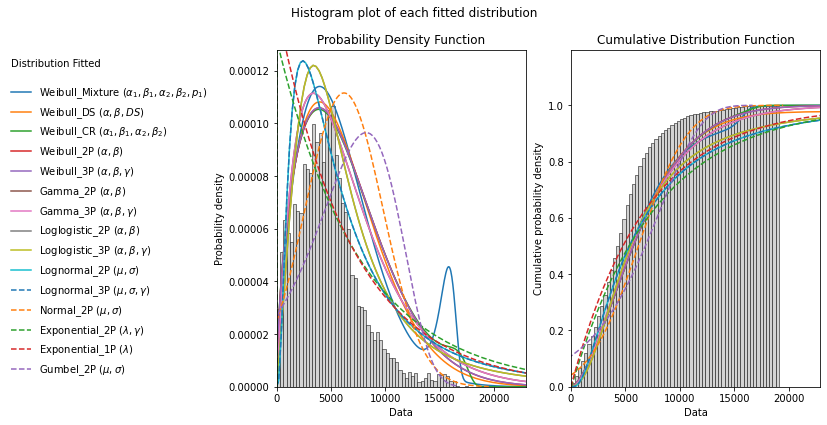

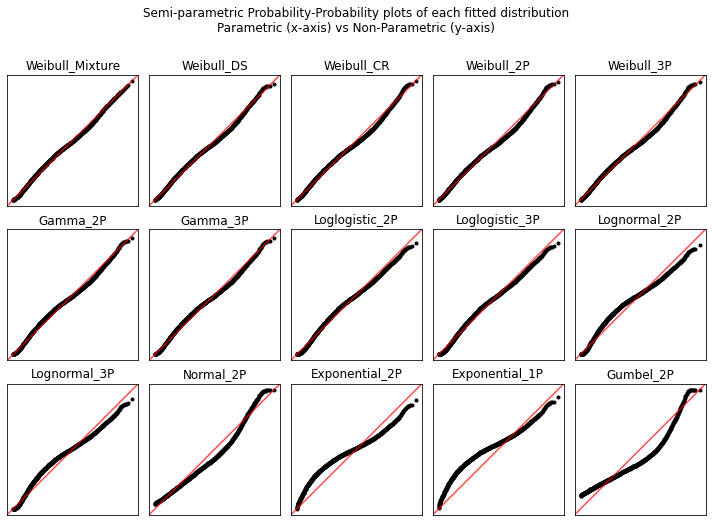

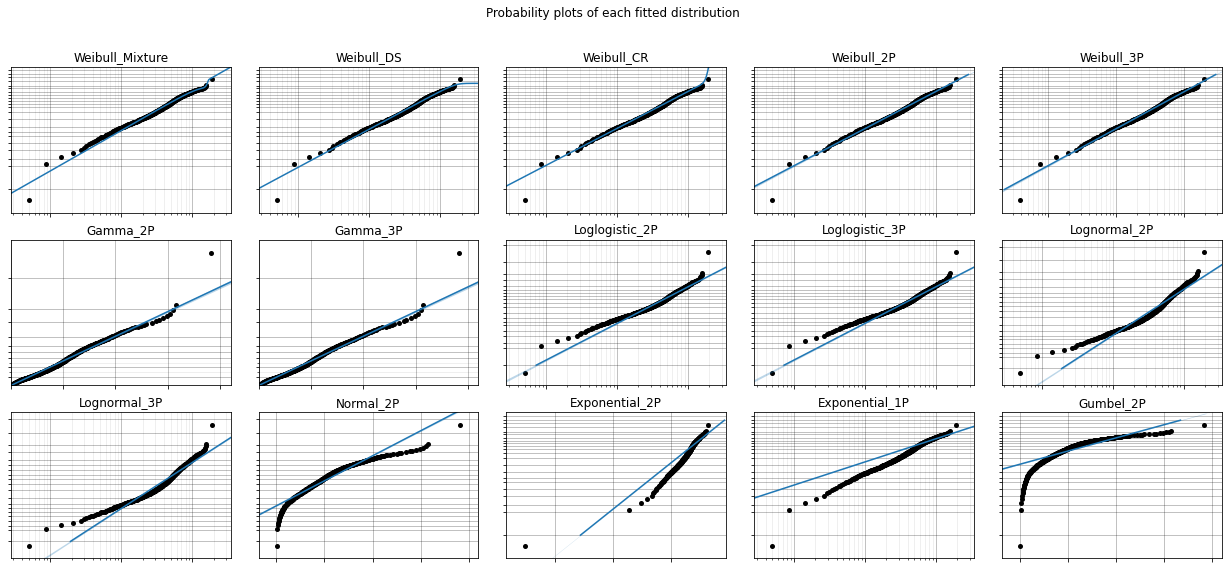

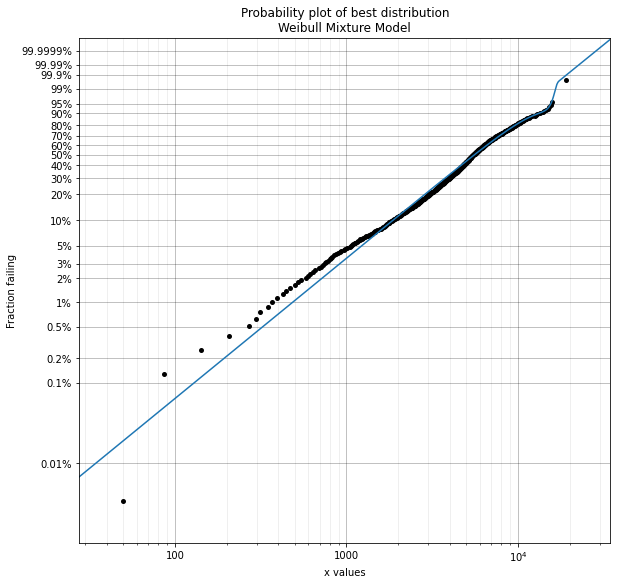

In [17]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures= failure_times, right_censored = censored_failures)